In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("/content/Churn_Modelling.xlsx")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [4]:
# Check if Data has any null values
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [5]:
# Check for Object datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
# Label encode Object Datatypes

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [7]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [8]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [9]:
# Imported Network designed in previous lesson

# Start your model with Sequential Object
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in
model.add(tf.keras.Input(shape=(10,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(32))
# 2nd layer
model.add(tf.keras.layers.Dense(32))
# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [11]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6503 - loss: 538.0258 - val_accuracy: 0.8020 - val_loss: 122.0693
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6634 - loss: 374.3427 - val_accuracy: 0.6725 - val_loss: 52.4685
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6737 - loss: 199.8843 - val_accuracy: 0.8020 - val_loss: 316.2430
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6923 - loss: 343.6984 - val_accuracy: 0.7315 - val_loss: 265.3081
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6797 - loss: 269.6368 - val_accuracy: 0.8010 - val_loss: 96.7020
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6919 - loss: 238.9113 - val_accuracy: 0.4150 - val_loss: 113.1775
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6577 - loss: 226.3797 - val_accuracy: 0.8020 - val_loss: 276.2354
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss:

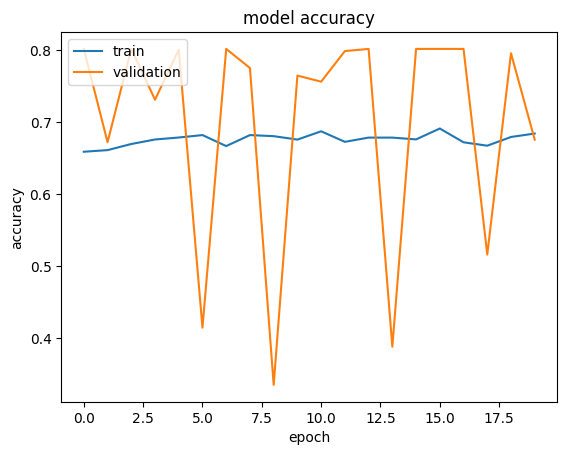

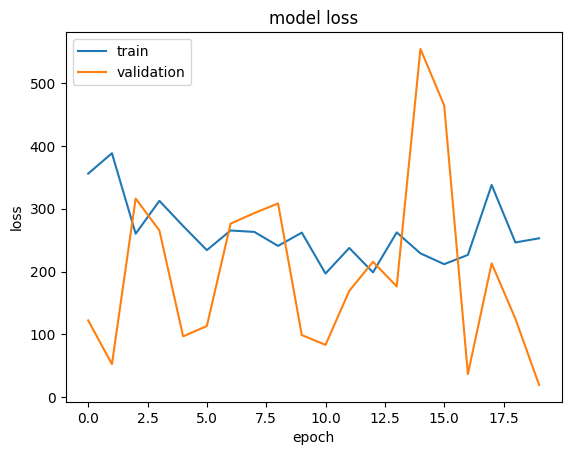

In [12]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable

In [13]:
# collect predictions
predictions = np.round(model.predict(Xtest))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [14]:
# Check Accuracy

from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # Accuracy Seems good

0.676

In [15]:
confusion_matrix(Ytest , predictions)

array([[1211,  393],
       [ 255,  141]])

In [ ]:
# So we are predicting everything to be 0 , as Dataset is Imbalanced we still see a better Accuracy
# In next lesson we will try to improve our model's performance